In [2]:
# Import pandas
import pandas as pd

# Import yfinance
import yfinance as yf

# Import numpy
import numpy as np

# Import plot lib
import matplotlib.pyplot as plt

# Import evaluate library
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, mean_absolute_error

# Import the required libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

2025-03-20 10:32:21.342546: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-20 10:32:21.355356: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742441541.370205   22079 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742441541.375463   22079 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 10:32:21.391875: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# 'BTC-USD': 'Bitcoin USD',
# 'ETH-USD': 'Ethereum USD',
# 'SOL-USD': 'Solana USD'

crypto = "BTC-USD"
crypto_data = yf.Ticker(crypto)
info = crypto_data.info
for key,value in info.items():
    print(key,' : ',value)

companyOfficers  :  []
name  :  Bitcoin
startDate  :  1278979200
description  :  Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,838,918. The last known price of Bitcoin is 83,477.39501709 USD and is up 0.51 over the last 24 hours. It is currently trading on 11982 active market(s) with $23,514,621,740.72 traded over the last 24 hours. More information can be found at https://bitcoin.org/.
executiveTeam  :  []
maxAge  :  86400
priceHint  :  2
previousClose  :  86870.87
open  :  86870.87
dayLow  :  85743.75
dayHigh  :  87427.31
regularMarketPreviousClose  :  86870.87
regularMarketOpen  :  86870.87
regularMarketDayLow  :  85743.75
regularMarketDayHigh  :  87427.31
volume  :  36495724544
regularMarketVolume  :  36495724544
averageVolume  :  47198447270
averageVolume10days  :  32518714121
averageDailyVolume10Day  :  32518714121
marketCap  :  1704496332800
fiftyTwoWeekLow  :  49121.24
fiftyTw

In [4]:
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

# Period must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

interval = "1h"
period = "3mo"

In [5]:
crypto_data_hist = crypto_data.history(interval=interval,period=period)
print(crypto_data_hist)

                                   Open          High           Low  \
Datetime                                                              
2024-12-20 03:00:00+00:00  97510.351562  97652.031250  96921.367188   
2024-12-20 04:00:00+00:00  97017.828125  97716.500000  96846.765625   
2024-12-20 05:00:00+00:00  97250.593750  97348.382812  96624.382812   
2024-12-20 06:00:00+00:00  96694.992188  97194.453125  96330.890625   
2024-12-20 07:00:00+00:00  97169.296875  98017.500000  97169.296875   
...                                 ...           ...           ...   
2025-03-19 23:00:00+00:00  86224.414062  87001.984375  86224.414062   
2025-03-20 00:00:00+00:00  86870.867188  87442.195312  86031.054688   
2025-03-20 01:00:00+00:00  86085.039062  86382.843750  85789.570312   
2025-03-20 02:00:00+00:00  85876.796875  86116.109375  85701.515625   
2025-03-20 03:00:00+00:00  86082.703125  86140.390625  85914.687500   

                                  Close      Volume  Dividends  Stock Splits

In [6]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                  Close
Datetime                               
2024-12-20 03:00:00+00:00  97039.398438
2024-12-20 04:00:00+00:00  97262.351562
2024-12-20 05:00:00+00:00  96742.257812
2024-12-20 06:00:00+00:00  96709.351562
2024-12-20 07:00:00+00:00  97652.218750
...                                 ...
2025-03-19 23:00:00+00:00  86802.453125
2025-03-20 00:00:00+00:00  86208.992188
2025-03-20 01:00:00+00:00  85861.000000
2025-03-20 02:00:00+00:00  86084.164062
2025-03-20 03:00:00+00:00  85915.382812

[2160 rows x 1 columns]


In [7]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                  Close
Datetime                               
2024-12-20 03:00:00+00:00  97039.398438
2024-12-20 04:00:00+00:00  97262.351562
2024-12-20 05:00:00+00:00  96742.257812
2024-12-20 06:00:00+00:00  96709.351562
2024-12-20 07:00:00+00:00  97652.218750
...                                 ...
2025-03-19 23:00:00+00:00  86802.453125
2025-03-20 00:00:00+00:00  86208.992188
2025-03-20 01:00:00+00:00  85861.000000
2025-03-20 02:00:00+00:00  86084.164062
2025-03-20 03:00:00+00:00  85915.382812

[2160 rows x 1 columns]


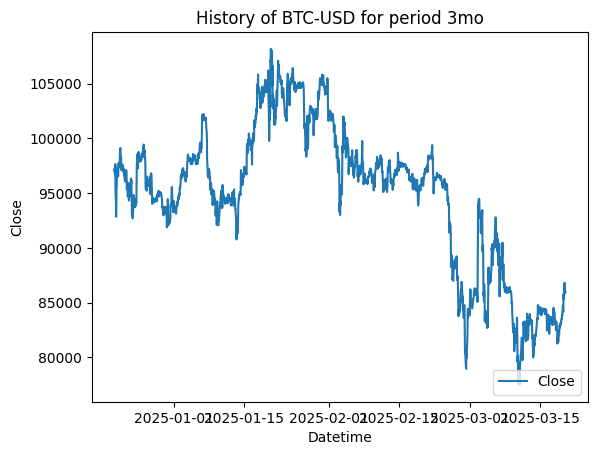

In [8]:
plt.title(f"History of {crypto} for period {period}")
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(crypto_data_hist['Close'])

plt.legend(['Close'], loc='lower right')

plt.show()

In [9]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                  Close
Datetime                               
2024-12-20 03:00:00+00:00  97039.398438
2024-12-20 04:00:00+00:00  97262.351562
2024-12-20 05:00:00+00:00  96742.257812
2024-12-20 06:00:00+00:00  96709.351562
2024-12-20 07:00:00+00:00  97652.218750
...                                 ...
2025-03-19 23:00:00+00:00  86802.453125
2025-03-20 00:00:00+00:00  86208.992188
2025-03-20 01:00:00+00:00  85861.000000
2025-03-20 02:00:00+00:00  86084.164062
2025-03-20 03:00:00+00:00  85915.382812

[2160 rows x 1 columns]


In [10]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                  Close
Datetime                               
2024-12-20 03:00:00+00:00  97039.398438
2024-12-20 04:00:00+00:00  97262.351562
2024-12-20 05:00:00+00:00  96742.257812
2024-12-20 06:00:00+00:00  96709.351562
2024-12-20 07:00:00+00:00  97652.218750
...                                 ...
2025-03-19 23:00:00+00:00  86802.453125
2025-03-20 00:00:00+00:00  86208.992188
2025-03-20 01:00:00+00:00  85861.000000
2025-03-20 02:00:00+00:00  86084.164062
2025-03-20 03:00:00+00:00  85915.382812

[2160 rows x 1 columns]


In [11]:
# Scale into range 0..1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data_close)
print(scaled_data)

[[0.6372373 ]
 [0.64449643]
 [0.62756269]
 ...
 [0.27327957]
 [0.28054558]
 [0.27505022]]


In [12]:
# Define train size
split = 0.8
train_size = int(len(scaled_data) * split)
print(train_size)

1728


In [13]:
# Define training and testing area before scaled
train_data = crypto_data_close[:train_size]
test_data = crypto_data_close[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
                                  Close
Datetime                               
2024-12-20 03:00:00+00:00  97039.398438
2024-12-20 04:00:00+00:00  97262.351562
2024-12-20 05:00:00+00:00  96742.257812
2024-12-20 06:00:00+00:00  96709.351562
2024-12-20 07:00:00+00:00  97652.218750
...                                 ...
2025-03-01 23:00:00+00:00  86039.757812
2025-03-02 00:00:00+00:00  85988.085938
2025-03-02 01:00:00+00:00  86305.265625
2025-03-02 02:00:00+00:00  85671.164062
2025-03-02 03:00:00+00:00  85876.812500

[1728 rows x 1 columns]
Data Testing
                                  Close
Datetime                               
2025-03-02 04:00:00+00:00  85680.695312
2025-03-02 05:00:00+00:00  85900.976562
2025-03-02 06:00:00+00:00  86237.953125
2025-03-02 07:00:00+00:00  86202.179688
2025-03-02 08:00:00+00:00  85747.679688
...                                 ...
2025-03-19 23:00:00+00:00  86802.453125
2025-03-20 00:00:00+00:00  86208.992188
2025-03-20 01:00:00+00:00  8

In [14]:
# Define training and testing area after scaled
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
[[0.6372373 ]
 [0.64449643]
 [0.62756269]
 ...
 [0.28774443]
 [0.2670987 ]
 [0.27379441]]
Data Testing
[[0.26740903]
 [0.27458117]
 [0.2855528 ]
 [0.28438805]
 [0.26958998]
 [0.27670743]
 [0.27627678]
 [0.28068039]
 [0.27571082]
 [0.26508487]
 [0.24716317]
 [0.32773734]
 [0.45739601]
 [0.53871141]
 [0.5033808 ]
 [0.52281523]
 [0.55200871]
 [0.54354515]
 [0.55294377]
 [0.54148579]
 [0.51780215]
 [0.50860347]
 [0.51458797]
 [0.49591308]
 [0.49982372]
 [0.51326628]
 [0.45320378]
 [0.48603523]
 [0.4517053 ]
 [0.46922435]
 [0.48922373]
 [0.4948773 ]
 [0.50479432]
 [0.52037966]
 [0.39689575]
 [0.40952433]
 [0.41292878]
 [0.41579906]
 [0.31607129]
 [0.26663931]
 [0.27552233]
 [0.24867818]
 [0.30089649]
 [0.2783397 ]
 [0.27864291]
 [0.18918089]
 [0.21186029]
 [0.21370267]
 [0.19763148]
 [0.22041339]
 [0.20696015]
 [0.18359193]
 [0.20735773]
 [0.20331939]
 [0.20977574]
 [0.21006903]
 [0.20532152]
 [0.16930208]
 [0.20190714]
 [0.1724687 ]
 [0.20007316]
 [0.25455661]
 [0.30490532]
 

In [15]:
# lookback = 5
# [30, 31, 94, 50, 27, 68, 37, 69, 27, 57, 25, 48, 50]
# train data  =   [30, 31, 94, 50, 27] => 68
#                 [31, 94, 50, 27, 68] => 37
#                 [94, 50, 27, 68, 37] => 69
#                 ...
#                 [69, 27, 57, 25, 48] => 50
# x train data = ([30, 31, 94, 50, 27], [31, 94, 50, 27, 68], [94, 50, 27, 68, 37], ..., [69, 27, 57, 25, 48])
# y train data = (68, 37, 69, 27, 57, 25, 48, 50)
lookback = int(24/2)
x_data = []
y_data = []
for i in range(lookback,len(scaled_data)):
    x_data.append(scaled_data[i-lookback:i,0])
    y_data.append(scaled_data[i,0])

# Converting the x and y values to numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

# Reshaping x and y data to make the calculations easier
x_data = np.reshape(x_data, (x_data.shape[0],x_data.shape[1],1))
y_data = np.reshape(y_data, (y_data.shape[0],1))
print(f"X Data : {x_data.shape}")
print(x_data)
print(f"Y Data : {y_data.shape}")
print(y_data)

X Data : (2148, 12, 1)
[[[0.6372373 ]
  [0.64449643]
  [0.62756269]
  ...
  [0.52887833]
  [0.57832175]
  [0.59417697]]

 [[0.64449643]
  [0.62756269]
  [0.62649129]
  ...
  [0.57832175]
  [0.59417697]
  [0.63600997]]

 [[0.62756269]
  [0.62649129]
  [0.65719013]
  ...
  [0.59417697]
  [0.63600997]
  [0.62332187]]

 ...

 [[0.21914384]
  [0.22197393]
  [0.2363551 ]
  ...
  [0.28404287]
  [0.30393237]
  [0.28460986]]

 [[0.22197393]
  [0.2363551 ]
  [0.23205985]
  ...
  [0.30393237]
  [0.28460986]
  [0.27327957]]

 [[0.2363551 ]
  [0.23205985]
  [0.21769624]
  ...
  [0.28460986]
  [0.27327957]
  [0.28054558]]]
Y Data : (2148, 1)
[[0.63600997]
 [0.62332187]
 [0.6467514 ]
 ...
 [0.27327957]
 [0.28054558]
 [0.27505022]]


In [16]:
xy_train_size = int(x_data.shape[0]*split)
print(xy_train_size)

1718


In [17]:
x_train_data = x_data[:xy_train_size,:,:]
y_train_data = y_data[:xy_train_size,:]
print("X Train Data")
print(x_train_data)
print("Y Train Data")
print(y_train_data)

X Train Data
[[[0.6372373 ]
  [0.64449643]
  [0.62756269]
  ...
  [0.52887833]
  [0.57832175]
  [0.59417697]]

 [[0.64449643]
  [0.62756269]
  [0.62649129]
  ...
  [0.57832175]
  [0.59417697]
  [0.63600997]]

 [[0.62756269]
  [0.62649129]
  [0.65719013]
  ...
  [0.59417697]
  [0.63600997]
  [0.62332187]]

 ...

 [[0.23735044]
  [0.25105499]
  [0.25110306]
  ...
  [0.27741737]
  [0.28774443]
  [0.2670987 ]]

 [[0.25105499]
  [0.25110306]
  [0.25401303]
  ...
  [0.28774443]
  [0.2670987 ]
  [0.27379441]]

 [[0.25110306]
  [0.25401303]
  [0.25909274]
  ...
  [0.2670987 ]
  [0.27379441]
  [0.26740903]]]
Y Train Data
[[0.63600997]
 [0.62332187]
 [0.6467514 ]
 ...
 [0.27379441]
 [0.26740903]
 [0.27458117]]


In [18]:

x_test_data = x_data[xy_train_size:,:,:]
y_test_data = y_data[xy_train_size:,:]
print("X Test Data")
print(x_test_data)
print("Y Test Data")
print(y_test_data)

X Test Data
[[[0.25401303]
  [0.25909274]
  [0.26001508]
  ...
  [0.27379441]
  [0.26740903]
  [0.27458117]]

 [[0.25909274]
  [0.26001508]
  [0.2767031 ]
  ...
  [0.26740903]
  [0.27458117]
  [0.2855528 ]]

 [[0.26001508]
  [0.2767031 ]
  [0.28039525]
  ...
  [0.27458117]
  [0.2855528 ]
  [0.28438805]]

 ...

 [[0.21914384]
  [0.22197393]
  [0.2363551 ]
  ...
  [0.28404287]
  [0.30393237]
  [0.28460986]]

 [[0.22197393]
  [0.2363551 ]
  [0.23205985]
  ...
  [0.30393237]
  [0.28460986]
  [0.27327957]]

 [[0.2363551 ]
  [0.23205985]
  [0.21769624]
  ...
  [0.28460986]
  [0.27327957]
  [0.28054558]]]
Y Test Data
[[0.2855528 ]
 [0.28438805]
 [0.26958998]
 [0.27670743]
 [0.27627678]
 [0.28068039]
 [0.27571082]
 [0.26508487]
 [0.24716317]
 [0.32773734]
 [0.45739601]
 [0.53871141]
 [0.5033808 ]
 [0.52281523]
 [0.55200871]
 [0.54354515]
 [0.55294377]
 [0.54148579]
 [0.51780215]
 [0.50860347]
 [0.51458797]
 [0.49591308]
 [0.49982372]
 [0.51326628]
 [0.45320378]
 [0.48603523]
 [0.4517053 ]
 [0.

In [19]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train_data.shape[1],x_train_data.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.summary()

epoch = 200

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data, y_train_data, epochs=epoch, batch_size=32)

I0000 00:00:1742441544.216114   22079 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 177 MB memory:  -> device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1
2025-03-20 10:32:24.230356: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1193] failed to allocate 177.62MiB (186253312 bytes) from device: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory
/home/acelanchester/miniconda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1742441547.025215   22202 cuda_dnn.cc:529] Loaded cuDNN version 90300


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0901
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0015
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0013
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0013
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 
Epoch 9/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 10/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 
Epoch 11/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 12/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011  
Epoch 13/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 14/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 15/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011  
Epoch 

In [20]:
# Save the model to a file
model.save('rnnbtc1h.keras')

In [21]:
# Predict data for test data
predictions = model.predict(x_test_data)
predictions = scaler.inverse_transform(predictions)
print(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[85891.17 ]
 [86232.99 ]
 [86183.58 ]
 [85712.64 ]
 [85957.73 ]
 [85930.12 ]
 [86075.59 ]
 [85909.984]
 [85578.59 ]
 [85023.31 ]
 [87621.89 ]
 [91853.11 ]
 [94353.164]
 [92788.   ]
 [93551.52 ]
 [94483.22 ]
 [94120.48 ]
 [94447.4  ]
 [94069.79 ]
 [93319.414]
 [93066.25 ]
 [93296.02 ]
 [92717.38 ]
 [92843.23 ]
 [93288.836]
 [91364.08 ]
 [92404.11 ]
 [91351.17 ]
 [91894.055]
 [92554.85 ]
 [92718.516]
 [93018.6  ]
 [93510.234]
 [89501.45 ]
 [89968.52 ]
 [90139.41 ]
 [90238.65 ]
 [87103.57 ]
 [85612.766]
 [85868.46 ]
 [85080.016]
 [86695.586]
 [86003.125]
 [86030.79 ]
 [83238.39 ]
 [83986.84 ]
 [84009.875]
 [83540.38 ]
 [84267.15 ]
 [83826.016]
 [83129.65 ]
 [83884.2  ]
 [83727.195]
 [83951.71 ]
 [83947.39 ]
 [83798.91 ]
 [82679.055]
 [83734.04 ]
 [82762.59 ]
 [83685.91 ]
 [85373.61 ]
 [86954.41 ]
 [88341.125]
 [86583.96 ]
 [87462.89 ]
 [87452.95 ]
 [87205.61 ]
 [86683.68 ]
 [87600.125]
 [87457.39 ]
 [87109.945]
 [86826.47 ]
 [87103.46 ]
 [87477.375

In [22]:
y_test = y_test_data.reshape(y_test_data.shape[0],1)
y_test = scaler.inverse_transform(y_test)
print(y_test)

[[86237.953125 ]
 [86202.1796875]
 [85747.6796875]
 [85966.28125  ]
 [85953.0546875]
 [86088.3046875]
 [85935.671875 ]
 [85609.3125   ]
 [85058.875    ]
 [87533.5859375]
 [91515.8515625]
 [94013.328125 ]
 [92928.203125 ]
 [93525.1015625]
 [94421.734375 ]
 [94161.7890625]
 [94450.453125 ]
 [94098.5390625]
 [93371.1328125]
 [93088.609375 ]
 [93272.4140625]
 [92698.84375  ]
 [92818.953125 ]
 [93231.8203125]
 [91387.09375  ]
 [92395.4609375]
 [91341.0703125]
 [91879.140625 ]
 [92493.390625 ]
 [92667.03125  ]
 [92971.6171875]
 [93450.296875 ]
 [89657.6796875]
 [90045.546875 ]
 [90150.109375 ]
 [90238.265625 ]
 [87175.28125  ]
 [85657.0546875]
 [85929.8828125]
 [85105.40625  ]
 [86709.2109375]
 [86016.4140625]
 [86025.7265625]
 [83278.0390625]
 [83974.6015625]
 [84031.1875   ]
 [83537.5859375]
 [84237.296875 ]
 [83824.1015625]
 [83106.3828125]
 [83836.3125   ]
 [83712.28125  ]
 [83910.578125 ]
 [83919.5859375]
 [83773.7734375]
 [82667.4921875]
 [83668.90625  ]
 [82764.75     ]
 [83612.578125

In [23]:
# Difference of y_test and predictions
print("Difference of actual and prediction")
print(predictions-y_test)

Difference of actual and prediction
[[-3.46781250e+02]
 [ 3.08125000e+01]
 [ 4.35898438e+02]
 [-2.53640625e+02]
 [ 4.67187500e+00]
 [-1.58187500e+02]
 [ 1.39921875e+02]
 [ 3.00671875e+02]
 [ 5.19718750e+02]
 [-2.51027344e+03]
 [-3.89396094e+03]
 [-2.16021875e+03]
 [ 1.42496094e+03]
 [-7.37101562e+02]
 [-8.70210938e+02]
 [ 3.21429688e+02]
 [-3.29976562e+02]
 [ 3.48859375e+02]
 [ 6.98656250e+02]
 [ 2.30804688e+02]
 [-2.06164062e+02]
 [ 5.97179688e+02]
 [-1.01570312e+02]
 [-3.88593750e+02]
 [ 1.90174219e+03]
 [-1.03138281e+03]
 [ 1.06303906e+03]
 [-5.27968750e+02]
 [-5.99335938e+02]
 [-1.12179688e+02]
 [-2.53101562e+02]
 [-4.31695312e+02]
 [ 3.85255469e+03]
 [-5.44093750e+02]
 [-1.81585938e+02]
 [-9.88593750e+01]
 [ 3.06336719e+03]
 [ 1.44651562e+03]
 [-3.17117188e+02]
 [ 7.63054688e+02]
 [-1.62919531e+03]
 [ 6.79171875e+02]
 [-2.26015625e+01]
 [ 2.75275000e+03]
 [-7.36210938e+02]
 [-4.43437500e+01]
 [ 4.72289062e+02]
 [-6.96914062e+02]
 [ 4.43046875e+02]
 [ 7.19632812e+02]
 [-7.06664062e

In [24]:
# Evaluation
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(f"Mean Squared Error              : {mse}")
print(f"Mean Absolute Error             : {mae}")
print(f"Root Mean Squared Error         : {rmse}")
print(f"Mean Absolute Percentage Error  : {mape}")

Mean Squared Error              : 515405.992983512
Mean Absolute Error             : 460.9263081395349
Root Mean Squared Error         : 717.9178177086233
Mean Absolute Percentage Error  : 0.005401975313180153


In [25]:
predict = pd.DataFrame(predictions,index=crypto_data_close.index[xy_train_size+lookback:],columns=["Close"])
print(predict)

                                  Close
Datetime                               
2025-03-02 06:00:00+00:00  85891.171875
2025-03-02 07:00:00+00:00  86232.992188
2025-03-02 08:00:00+00:00  86183.578125
2025-03-02 09:00:00+00:00  85712.640625
2025-03-02 10:00:00+00:00  85957.726562
...                                 ...
2025-03-19 23:00:00+00:00  86212.265625
2025-03-20 00:00:00+00:00  86824.953125
2025-03-20 01:00:00+00:00  86157.921875
2025-03-20 02:00:00+00:00  85829.203125
2025-03-20 03:00:00+00:00  86068.867188

[430 rows x 1 columns]


In [26]:
train = crypto_data_close[:xy_train_size+lookback]
valid = crypto_data_close[xy_train_size+lookback:]
print("Train Data")
print(train["Close"])
print("Valid Data")
print(valid["Close"])
print("Predict Data")
print(predict)

Train Data
Datetime
2024-12-20 03:00:00+00:00    97039.398438
2024-12-20 04:00:00+00:00    97262.351562
2024-12-20 05:00:00+00:00    96742.257812
2024-12-20 06:00:00+00:00    96709.351562
2024-12-20 07:00:00+00:00    97652.218750
                                 ...     
2025-03-02 01:00:00+00:00    86305.265625
2025-03-02 02:00:00+00:00    85671.164062
2025-03-02 03:00:00+00:00    85876.812500
2025-03-02 04:00:00+00:00    85680.695312
2025-03-02 05:00:00+00:00    85900.976562
Name: Close, Length: 1730, dtype: float64
Valid Data
Datetime
2025-03-02 06:00:00+00:00    86237.953125
2025-03-02 07:00:00+00:00    86202.179688
2025-03-02 08:00:00+00:00    85747.679688
2025-03-02 09:00:00+00:00    85966.281250
2025-03-02 10:00:00+00:00    85953.054688
                                 ...     
2025-03-19 23:00:00+00:00    86802.453125
2025-03-20 00:00:00+00:00    86208.992188
2025-03-20 01:00:00+00:00    85861.000000
2025-03-20 02:00:00+00:00    86084.164062
2025-03-20 03:00:00+00:00    85915.3

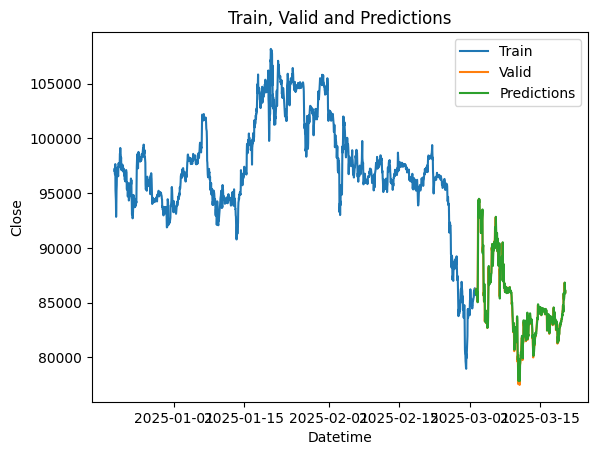

In [27]:
plt.title('Train, Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
 
plt.show()

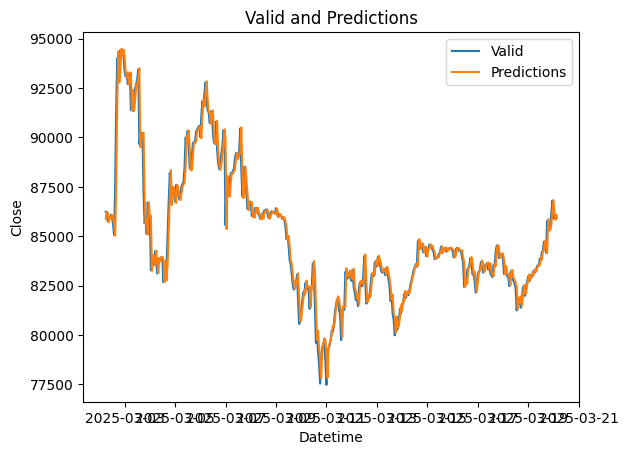

In [28]:
plt.title('Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Valid', 'Predictions'], loc='upper right')
 
plt.show()

In [29]:
closing_prices = scaled_data[len(scaled_data)-lookback:]
closing_prices = closing_prices.reshape(closing_prices.shape[0], 1)
print(closing_prices)

[[0.23205985]
 [0.21769624]
 [0.2704416 ]
 [0.25558476]
 [0.25531234]
 [0.26432483]
 [0.28404287]
 [0.30393237]
 [0.28460986]
 [0.27327957]
 [0.28054558]
 [0.27505022]]


In [30]:
current_batch = closing_prices.reshape(1, lookback, 1)
print(current_batch)

[[[0.23205985]
  [0.21769624]
  [0.2704416 ]
  [0.25558476]
  [0.25531234]
  [0.26432483]
  [0.28404287]
  [0.30393237]
  [0.28460986]
  [0.27327957]
  [0.28054558]
  [0.27505022]]]


In [31]:
predictions = []
time = int(24/2)
for i in range(time):  # Predicting 12 hours
    # Get the prediction (next hour)
    next_prediction = model.predict(current_batch)
    # print(scaler.inverse_transform(next_prediction))
    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    
    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    
    # Inverse transform the prediction to the original price scale
    predictions.append(scaler.inverse_transform(next_prediction)[0, 0])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[np.float32(85880.234), np.float32(85856.67), np.float32(85833.9), np.float32(85812.81), np.float32(85793.5), np.float32(85775.63), np.float32(85758.72), np.float32(85742.125), np.float32(85725.305), np.float32(85708.6), np.float32(85692.2), np.float32(85675.945)]


In [32]:
last_time = crypto_data_close.index[-1]
next_time = last_time + pd.Timedelta(hours=1)
prediction_times = pd.date_range(start=next_time, periods=len(predictions), freq='1h')
predict = pd.DataFrame(index=prediction_times, data=predictions, columns=['Close'])
print(predict)

                                  Close
2025-03-20 04:00:00+00:00  85880.234375
2025-03-20 05:00:00+00:00  85856.671875
2025-03-20 06:00:00+00:00  85833.898438
2025-03-20 07:00:00+00:00  85812.812500
2025-03-20 08:00:00+00:00  85793.500000
2025-03-20 09:00:00+00:00  85775.632812
2025-03-20 10:00:00+00:00  85758.718750
2025-03-20 11:00:00+00:00  85742.125000
2025-03-20 12:00:00+00:00  85725.304688
2025-03-20 13:00:00+00:00  85708.601562
2025-03-20 14:00:00+00:00  85692.203125
2025-03-20 15:00:00+00:00  85675.945312


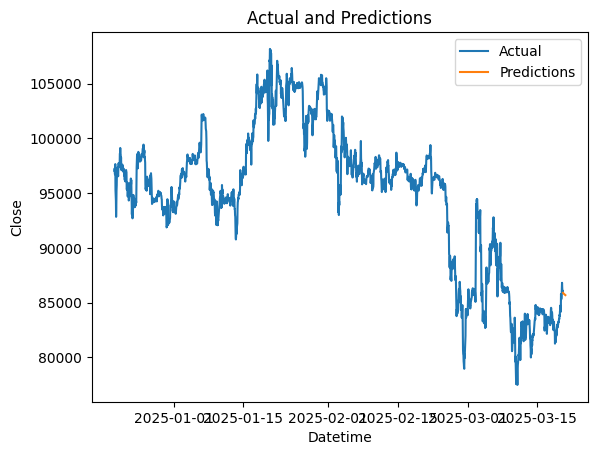

In [33]:
plt.title('Actual and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(crypto_data_close[['Close']])
plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()

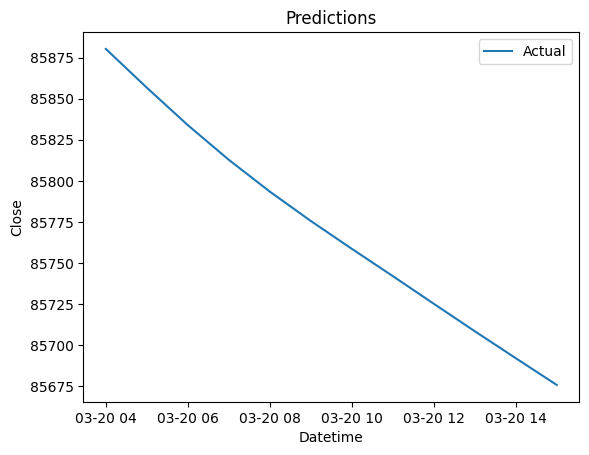

In [34]:
plt.title('Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()